In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

In [61]:
path = os.path.join("..", "data", "cluster_df.pickle")
with open(path, "rb") as archivo:
    cluster_df = pickle.load(archivo).T

In [3]:
cluster_df = cluster_df.astype(pd.SparseDtype(np.float64, fill_value=0))

In [4]:
cluster_df = cluster_df[cluster_df.sum(axis=1) > 0] # Muy importante, para no dividir por 0

# El porque algunos tienen 0, es o porque el anime que vieron no tenia tags, o habian visto algun anime que no sobrevivio la union MyAnimeList - AnimePlanet.
# Recuerden que si quieren ver el proceso de union, vean procesar_data.ipynb

In [6]:
# Hacer que todas las filas sumen 1
cluster_df_normal = cluster_df.sparse.to_dense()
cluster_df_normal = cluster_df_normal.div(cluster_df_normal.sum(axis=1), axis=0)

# No, yo tampoco sabia esto, y si, fue hecho por copilot.
# Dataframe.div basicamente divide cada serie de una axis de un dataframe, por una serie con los mismos indices de la axis.
# En este caso, se usa la axis de la fila (axis=0), y se divide por la serie de sumas de filas
# Y eso hace que todo sume 1.

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Let's do pca on the data

matriz = cluster_df_normal.to_numpy()

In [ ]:
inertia = []
kmax = 20

# entrenamiento y evaluación
for i in range(1,kmax):
    # modelo
    kmeans = KMeans(n_clusters=i, n_init='auto')
    nCluster = kmeans.fit(oceanData_sc)

    print(i, nCluster.inertia_)
    inertia.append(nCluster.inertia_)

In [62]:
cluster_df

,Dentists,Age Gap,Running,Emotional Abuse,Valentine,Coming of Age,Leijiverse,Animal Transformation,America,Modern Knowledge,...,Basketball,Shogi,Water Polo,Acting,Unrequited Love,Superheroes,World War 2,Outer Space,Based on an Eroge,Trapped in a Video Game
39110:xxbladexx20,0,0,0,0,7,0,0,0,0,0,...,0,0,0,0,20,0,0,0,68,0
216949:haijuta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
246587:d3athzero,0,40,8,161,8,176,0,89,65,33,...,110,27,0,40,69,80,14,188,342,84
107198:JayJay1401,0,0,0,46,0,45,0,0,30,0,...,32,0,0,27,16,64,7,14,0,7
45036:Seleare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197026:dumb_zoro_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
16617450:kotyboh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16459755:Tiberjuice,0,0,0,9,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
16965619:Watcher794_2,0,0,0,0,0,10,0,0,0,50,...,0,0,0,0,0,0,0,0,0,0


In [73]:
pca = PCA(n_components=200)
pca.fit(matriz)
X = pca.transform(matriz)

# plt.scatter(X[:, 0], X[:, 1], alpha=0.1)

In [74]:
[pca.explained_variance_ratio_[0:x].sum() for x in range(1, pca.n_components_ + 1)]

[0.10919917197081144,
 0.19506860811023075,
 0.24951040004855973,
 0.29445708029399126,
 0.33238960619300584,
 0.3665999182641622,
 0.3956018117985754,
 0.422964816815677,
 0.4490739368696379,
 0.47178293142210476,
 0.491621552327756,
 0.5097333322609692,
 0.5265952546234748,
 0.5419516502470113,
 0.556815134188387,
 0.5705168769124145,
 0.583472604253678,
 0.5952010629515531,
 0.6062227706650505,
 0.6162205243948824,
 0.6258909124735568,
 0.6354135105140692,
 0.6447421909897797,
 0.6533350376553901,
 0.6616017462315117,
 0.6694073606392434,
 0.6768912804715608,
 0.6841588088164052,
 0.6912916899678224,
 0.6979319213187305,
 0.7042751882946547,
 0.7101931469717071,
 0.7159918329886684,
 0.7217512587553948,
 0.7272903599003768,
 0.7327088068697861,
 0.7380639281811493,
 0.7430600068573933,
 0.7479958453283435,
 0.7527033460107918,
 0.7572412246252672,
 0.761759592057751,
 0.7661731213558561,
 0.7704196813811467,
 0.7745874379532478,
 0.7787120580386825,
 0.7826468263963934,
 0.786508791

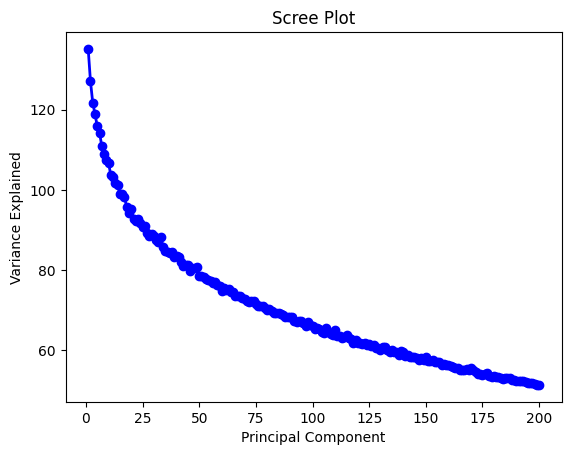

In [79]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(range(1,kmax + 1), inertia, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

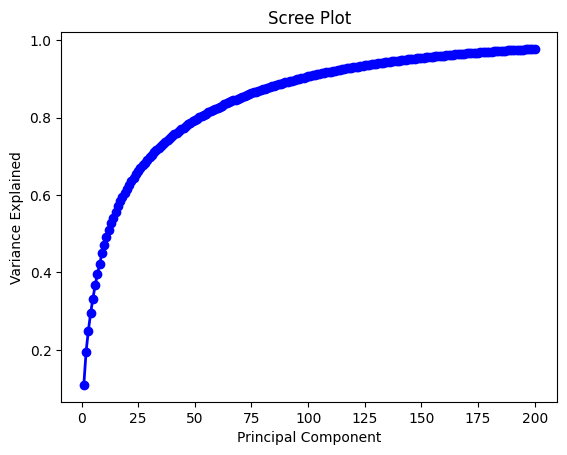

In [78]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, [pca.explained_variance_ratio_[0:x].sum() for x in range(1, pca.n_components_ + 1)], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
 
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()


In [16]:
X_df = pd.DataFrame(X)
X_df.index = cluster_df_normal.index
X_df.columns = ["PC1", "PC2"]
X_df

,PC1,PC2
39110:xxbladexx20,0.098126,0.041013
216949:haijuta,-0.000960,-0.044814
246587:d3athzero,0.015337,0.007365
107198:JayJay1401,-0.011467,0.009743
45036:Seleare,0.147996,0.142949
...,...,...
17197026:dumb_zoro_,-0.046203,0.013801
16617450:kotyboh,0.017342,0.057294
16459755:Tiberjuice,-0.002989,-0.044010
16965619:Watcher794_2,0.060331,-0.036297


In [70]:
print(X_df["PC3"].min())
print(X_df["PC3"].max())

-0.12890713155464065
0.23095977689724997


C:\Users\vamar\AppData\Local\Temp\ipykernel_15692\4227104559.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  eda.scatter(data=X_df, x="PC1", y="PC2", cmap="viridis", norm=norm, alpha=0.5, linewidth=1, c="red", s=6)


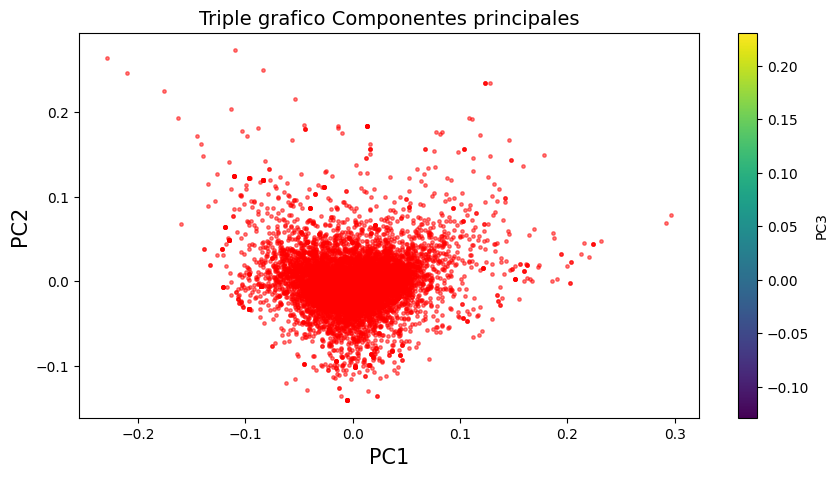

In [17]:
import matplotlib.colors as clrs

fig=plt.figure(figsize=(10,5))
eda = fig.add_subplot()

norm=plt.Normalize(-0.12890713155464065, 0.23095977689724997) # El rango de valores para el colormap
eda.scatter(data=X_df, x="PC1", y="PC2", cmap="viridis", norm=norm, alpha=0.5, linewidth=1, c="red", s=6)


eda.set_title("Triple grafico Componentes principales",fontsize=14)

plt.xlabel("PC1",  # Añade etiquetas para las coordenadas
           fontdict={"fontsize": 15})
plt.ylabel("PC2",
           fontdict={"fontsize": 15})

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="viridis"), ax=eda, label="PC3")

cbar.set_label("PC3", fontsize=10)

In [29]:
X[:,2]

array([-3.26946802e+01,  1.19701482e+02, -7.09431659e+00,  2.70157816e+02,
       -1.02650584e+01,  8.34313907e+02, -1.46117701e+01,  1.30895289e+02,
        1.27981722e+02, -5.26911385e+02,  4.97559826e+02, -1.40891346e+02,
        3.16775335e+02,  1.17629026e+03, -4.63644578e+01,  3.28548708e+02,
       -2.64224358e+02, -4.06883049e+01,  1.90058862e+03, -2.77527875e+01,
       -1.44840964e+00, -3.98258956e+01,  3.29219604e+01,  3.24578723e+02,
        3.45768975e+01, -1.49601243e+00,  3.03369062e+01, -1.03252592e+02,
        1.39095691e+02, -3.99386474e+03, -2.82512680e+03,  5.70900860e+02,
        2.97126030e+02,  2.46145852e+01, -3.49022193e+01,  3.38078243e+02,
       -1.49279036e+02, -2.31341576e+02,  5.60673622e+01,  6.36155098e+01,
        5.36413462e+00, -7.49366186e+01,  4.70618426e+02,  2.08516489e+02,
       -1.21026227e+02, -2.51499434e+01,  1.24915025e+01,  6.68161742e+02,
       -1.03525658e+01, -2.40483838e+01, -1.64280094e+01,  2.87653766e+02,
        2.13370366e+02,  

Text(0.5, 0, 'z-axis')

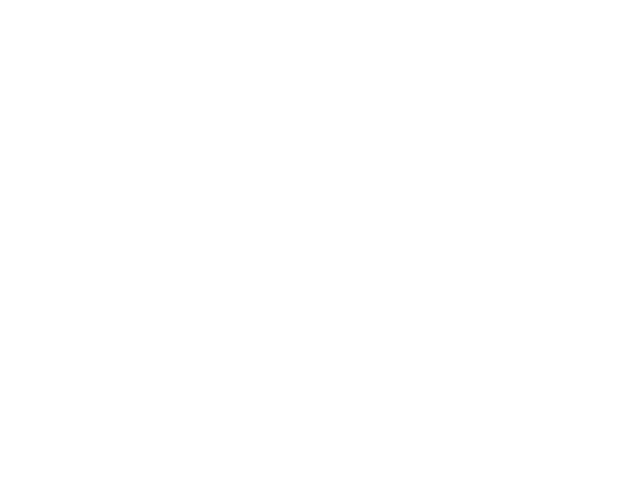

In [24]:
# creating 3d plot using matplotlib 
# in python

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# creating figure
fig = plt.figure()
ax = Axes3D(fig)

Xax = X[:,0]
Yax = X[:,1]
Zax = X[:,2]

# creating the plot
plot_geeks = ax.scatter3D(X_df["PC1"], X_df["PC2"], X_df["PC3"])
 
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')


In [49]:
from sklearn.cluster import KMeans

inertia = []
kmax = 200

# entrenamiento y evaluación
for i in range(1,kmax + 1):
    # modelo
    kmeans = KMeans(n_clusters=i, n_init='auto')
    nCluster = kmeans.fit(matriz)

    print(i, nCluster.inertia_)
    inertia.append(nCluster.inertia_)

1 135.1519628690569
2 127.06869159513629
3 121.75523162109707
4 118.94346767729797
5 115.83678089642069
6 114.28756661573036
7 110.89617036765792
8 109.05873415914931
9 107.37960890743899
10 106.61789607218834
11 103.58111893435701
12 103.26321780279703
13 101.66181199319776
14 101.1320604368187
15 99.03791744608583
16 98.85486234535801
17 98.08722799251707
18 95.80573718553012
19 94.31459128570833
20 95.31031756948397
21 92.8304822783763
22 92.1853018789317
23 92.60902514647972
24 91.6880963884482
25 90.80082004834338
26 90.86542806279334
27 89.22475804665453
28 88.5818409379093
29 89.07007765793982
30 88.41788912300721
31 87.46768904861969
32 86.85714322462442
33 88.13975868920565
34 85.61975215940308
35 84.747143642846
36 84.3789569478131
37 84.2846122363184
38 84.4320999492373
39 83.13708520054624
40 83.58006714855134
41 83.25023062563604
42 82.09830422045158
43 81.04071935393036
44 81.28501859629168
45 81.16073309917954
46 79.82568618778825
47 80.41425256550498
48 80.5810758170489

Text(0.5, 1.0, 'K-means - Método del codo')

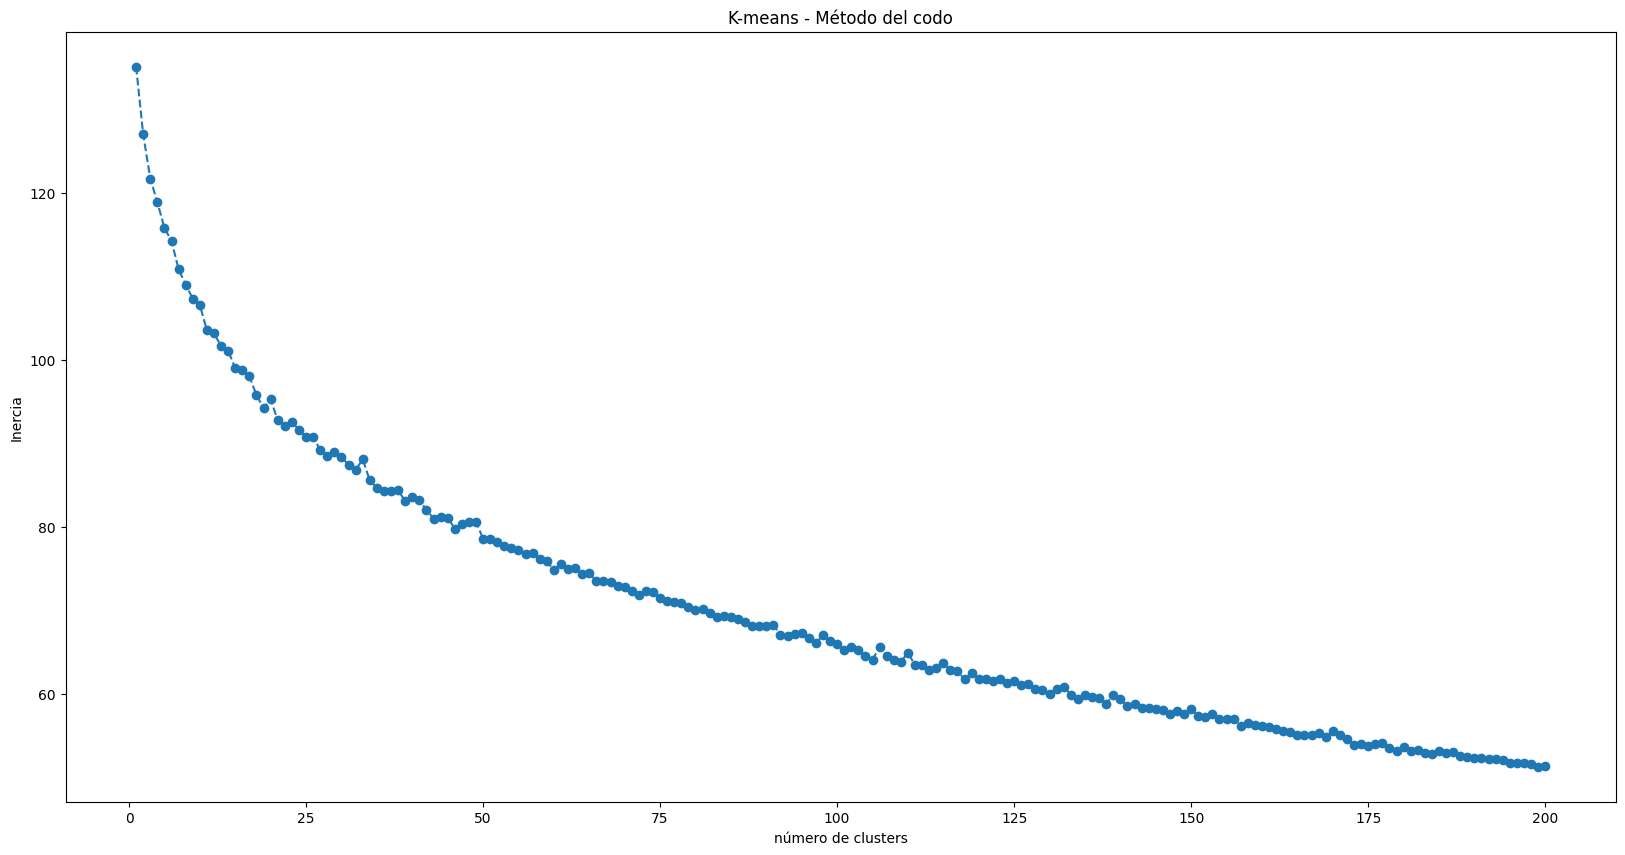

In [50]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1, kmax + 1), inertia, marker='o', ls='--')
ax.set_xlabel('número de clusters')
ax.set_ylabel('Inercia')
ax.set_title('K-means - Método del codo')

Text(0.5, 1.0, 'K-means - Método del codo')

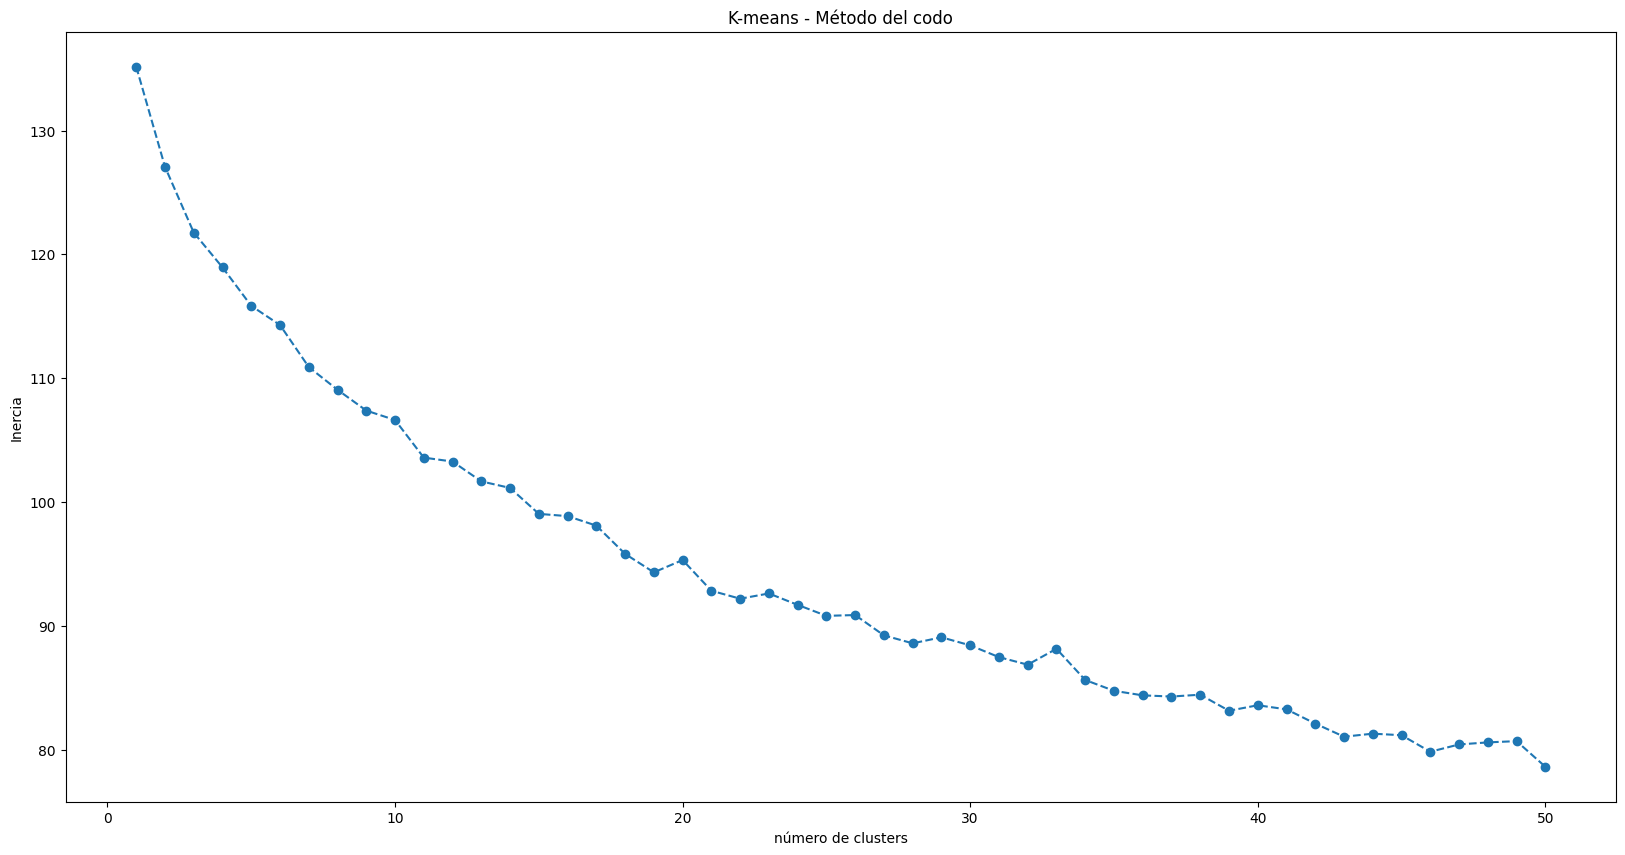

In [65]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1, 51), inertia[0:50], marker='o', ls='--')
ax.set_xlabel('número de clusters')
ax.set_ylabel('Inercia')
ax.set_title('K-means - Método del codo')